In [1]:
from dataset import create_dataset, create_sampler, create_loader
import argparse
import ruamel.yaml as yaml
import torch
import numpy as np
from matplotlib import pyplot as plt
import json

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def img_show(img):
    img = torch.permute(img,dims=(1,2,0)).detach().numpy()
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    plt.imshow(img)
    plt.axis(False)
    plt.show()

In [3]:
parser = argparse.ArgumentParser()     
parser.add_argument('--config', default='./configs/Retrieval_coco_romix.yaml')
parser.add_argument('--output_dir', default='output/Retrieval_full_romix_wj')        
parser.add_argument('--checkpoint', default='')   
parser.add_argument('--text_encoder', default='bert-base-uncased')
parser.add_argument('--evaluate', action='store_true')
parser.add_argument('--device', default='cuda')
parser.add_argument('--seed', default=42, type=int)
parser.add_argument('--world_size', default=1, type=int, help='number of distributed processes')    
parser.add_argument('--dist_url', default='env://', help='url used to set up distributed training')
parser.add_argument('--distributed', default=True, type=bool)
args = parser.parse_args([])

config = yaml.load(open(args.config, 'r'), Loader=yaml.Loader)
config['output_dir'] = args.output_dir

In [4]:
train_dataset, val_dataset, test_dataset = create_dataset('re', config)  

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:891: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [5]:
img_info_dict = json.load(open('data/COCO/Annotations/coco_img_info.json', 'r'))
train_file_dict = json.load(open('data/COCO/Annotations/coco_train.json', 'r'))

In [6]:
train_file_keys = list(str(item['image_id'].split('_')[-1]) for item in train_file_dict)

In [17]:
for i, (image, text, idx) in enumerate(train_dataset):
    # when loading is fail print the idx
    if i % 1000 == 0:
        print(i)

0


KeyboardInterrupt: 

In [20]:
train_dataset[1850].text

AttributeError: 'tuple' object has no attribute 'text'

In [ ]:
img_info_dict['318219']['captions']

['A young boy standing in front of a computer keyboard.',
 'a little boy wearing headphones and looking at a computer monitor',
 'He is listening intently to the computer at school.',
 'A young boy stares up at the computer monitor.',
 'a young kid with head phones on using a computer ']

In [ ]:
temp_list =[]
for keys in train_file_keys:
    if keys not in train_dataset.romixgen.image_info_dict.keys():
        temp_list.append(keys)

In [ ]:
len(train_dataset.romixgen.image_info_dict.keys())

45886

In [9]:
# see the 1850 steps data (batch is 2)
train_dataset[1850][0]

tensor([[[-1.0039, -1.1353, -1.3397,  ...,  1.7114,  1.6968,  1.6822],
         [-0.9748, -1.1207, -1.4711,  ...,  0.7333,  1.6968,  1.7698],
         [-1.0769, -0.7266, -0.9456,  ...,  0.7187,  1.7990,  1.7260],
         ...,
         [-0.6682, -0.7120, -0.7412,  ...,  0.3975,  0.3975,  0.3537],
         [-0.6682, -0.6974, -0.7704,  ...,  0.3829,  0.3245,  0.3245],
         [-0.6682, -0.7412, -0.7412,  ...,  0.2515,  0.1931,  0.2515]],

        [[-1.0767, -1.0617, -1.4970,  ...,  1.7747,  1.7747,  1.7597],
         [-1.0167, -0.8816, -1.5270,  ...,  0.7392,  1.7897,  1.8198],
         [-0.4764, -0.2813, -0.2063,  ...,  0.7692,  1.9098,  1.7897],
         ...,
         [-0.5365, -0.5815, -0.6115,  ..., -0.0262, -0.0262, -0.0712],
         [-0.5365, -0.5665, -0.6115,  ..., -0.0412, -0.1012, -0.1163],
         [-0.5065, -0.5665, -0.5665,  ..., -0.1763, -0.2363, -0.1913]],

        [[-0.9256, -0.8261, -1.0394,  ...,  1.9610,  1.8331,  1.9042],
         [-0.6839, -0.5986, -1.0536,  ...,  1

In [ ]:
'318219' in train_file_keys

True

In [ ]:
train_dataset.romixgen.raw_image_info

'data/COCO/Annotations/coco_img_info_small.json'

In [14]:
train_dataset[1850]

(tensor([[[ 1.8427,  1.6968,  1.7552,  ...,  1.7698,  0.6165, -0.8726],
          [ 1.7552,  1.6676,  1.4486,  ...,  0.9376, -0.9456,  0.9960],
          [ 1.5946,  1.5070,  1.1712,  ..., -0.6098,  0.7041,  1.5070],
          ...,
          [-0.7704, -0.9018, -0.8288,  ..., -0.5368, -0.5076, -0.4638],
          [-0.7850, -0.9310, -0.7558,  ..., -0.5660, -0.5660, -0.5368],
          [-0.7120, -0.8580, -0.8726,  ..., -0.6244, -0.6098, -0.5806]],
 
         [[ 1.9998,  1.8648,  1.9248,  ...,  1.9698,  0.6942, -1.2418],
          [ 1.9098,  1.8348,  1.5946,  ...,  1.0544, -1.0467,  0.6491],
          [ 1.7597,  1.6547,  1.2795,  ..., -0.7016,  0.3340,  0.7092],
          ...,
          [-0.9417, -0.9417, -1.0467,  ..., -0.8666, -0.8516, -0.8216],
          [-0.9417, -0.9267, -1.0317,  ..., -0.8816, -0.8816, -0.8516],
          [-0.8216, -0.9867, -1.0017,  ..., -0.9117, -0.9267, -0.9117]],
 
         [[ 2.0179,  1.9184,  1.9468,  ...,  2.0748,  0.8092, -1.0110],
          [ 1.9184,  1.8473,

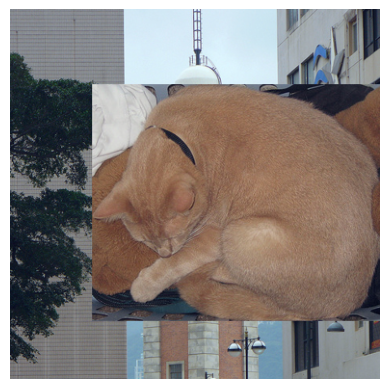

(None, 'Snow skiers climb a hill.')

In [20]:
img_show(train_dataset[3800][0]), train_dataset[3800][1]

In [27]:
train_dataset[3800][1]

'• Animals A small biplane landing on a road creating a lot of smoke.'

In [22]:
for i in range (100):
    print(train_dataset[3800][1])

/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:1839: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


A person windsurfing at the beach with mountains in the background.
- Cats a person walks near a fountain with an umbrella and an orange bag
A cat riding a surfboard in the water
A house is next to a marshy river
A large building with a large cat at the top.
A cat sitting in the water.
A small cat crossing a lake near a shore.
There are many cats flying around a large building
This stone tower has a cat at the top
Pets Indoor bathroom with shower curtains, towels and sunlit window.
Two houses behind a cat and snow in the road.
A person steals a cat in the snow.
A snowboarding man on a snowy mountain.
The bathroom mirror is above a wooden cat counter.
A group of cats walking through a green grass field.
Two cats near each other in a blue grey sky
An image of a man and a woman on a beach and the man sits in a tent.
• Animals A street sign in a city indicates the location.
Two cats on a hill with a stream running next door.
A group of snowboard and ski cats on a snow-covered slope.
Animal

In [ ]:
train_dataset.romixgen(temp_ann)

KeyError: '318219'

In [ ]:
train_dataset.romixgen.image_info_dict

{'3580': {'file_name': 'COCO_val2014_000000003580.jpg',
  'width': 640,
  'height': 480,
  'max_obj_super_cat': ['person', 'people'],
  'max_obj_cat': ['person', 'people'],
  'max_obj_area': 137299.84804999997,
  'max_obj_midpoint': [320.0, 279.295],
  'max_obj_bbox': [0.0, 83.86, 640.0, 390.87],
  'max_obj_area_portion': 0.4469396095377603,
  'captions': ['A man sitting on a touch holding a game controller.',
   'A man sitting on a sofa holding a game controller.',
   'Person with a device sitting in a living room.',
   'A man sitting on a couch playing with a game system.',
   'A man lounging on a sofa holding a Wii remote.'],
  'obj_bg': 'obj'},
 '100974': {'file_name': 'COCO_val2014_000000100974.jpg',
  'width': 640,
  'height': 322,
  'max_obj_super_cat': ['vehicle', 'vehicles'],
  'max_obj_cat': ['airplane', 'airplanes'],
  'max_obj_area': 31451.592950000006,
  'max_obj_midpoint': [294.68, 208.14999999999998],
  'max_obj_bbox': [2.77, 127.1, 583.82, 162.1],
  'max_obj_area_portio

In [29]:
from augmentation import RoMixGen_Txt

In [32]:
# random pick one


In [35]:
rmg_txt = RoMixGen_Txt()
rmg_txt.__get_dict__(train_dataset.romixgen.use_sub_dict_key(train_dataset.romixgen.image_info_dict,["file_name", "max_obj_super_cat", "max_obj_cat", "captions"], ))

In [38]:
temp_obj_id = train_dataset.romixgen.obj_bg_dict["obj"][100]
temp_bg_id = train_dataset.romixgen.obj_bg_dict["bg"][100]
rmg_txt(temp_obj_id, temp_bg_id)
print(temp_temp_bg_id)

'A large stretch of water with a lot of birds swimming on it.'

In [40]:
img_info_dict = train_dataset.romixgen.image_info_dict
obj_bg_dict= train_dataset.romixgen.obj_bg_dict

In [43]:
img_info_dict['57870']

{'file_name': 'COCO_train2014_000000057870.jpg',
 'width': 640,
 'height': 480,
 'max_obj_super_cat': ['furniture', 'furnitures'],
 'max_obj_cat': ['chair', 'chairs'],
 'max_obj_area': 23717.007900000004,
 'max_obj_midpoint': [176.59, 375.745],
 'max_obj_bbox': [90.67, 271.49, 171.84, 208.51],
 'max_obj_area_portion': 0.07720380175781251,
 'captions': ['A restaurant has modern wooden tables and chairs.',
  'A long restaurant table with rattan rounded back chairs.',
  'a long table with a plant on top of it surrounded with wooden chairs ',
  'A long table with a flower arrangement in the middle for meetings',
  'A table is adorned with wooden chairs with blue accents.'],
 'obj_bg': 'obj'}

In [41]:
obj_bg_dict.keys()

dict_keys(['obj', 'unusable_bg', 'bg'])

In [44]:
temp_dict = {"obj":{"caption_zero":0, "cat_zero":0, "sup_cat_zero":0}, "bg":{"caption_zero":0, "cat_zero":0, "sup_cat_zero":0}, "unusable_bg": {"caption_zero":0, "cat_zero":0, "sup_cat_zero":0}}
for item in img_info_dict:
    temp_captions,  temp_cat, temp_sup_cat =0, 0, 0
    if not img_info_dict[item]["captions"]:
        temp_captions = 1
    if not img_info_dict[item]["max_obj_cat"]:
        temp_cat = 1
    if not img_info_dict[item]["max_obj_super_cat"]:
        temp_sup_cat = 1
    temp_dict[img_info_dict[item]['obj_bg']]["caption_zero"] += temp_captions
    temp_dict[img_info_dict[item]['obj_bg']]["cat_zero"] += temp_cat
    temp_dict[img_info_dict[item]['obj_bg']]["sup_cat_zero"] += temp_sup_cat

In [45]:
temp_dict
#obj, bg에서는 category가 비는 경우가 없음

{'obj': {'caption_zero': 0, 'cat_zero': 0, 'sup_cat_zero': 0},
 'bg': {'caption_zero': 0, 'cat_zero': 0, 'sup_cat_zero': 0},
 'unusable_bg': {'caption_zero': 1069, 'cat_zero': 1069, 'sup_cat_zero': 1069}}